# DSTA

Application of Non-Negative Matrix Factorization on the Olivetti Faces Dataset
Code resources:
- [Scikit Learn tutorial: Face dataset decompositions](https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py)
- [Geeks for Geeks: Face dataset decompositions in Scikit Learn](https://www.geeksforgeeks.org/faces-dataset-decompositions-in-scikit-learn/)

# Import libraries

In [63]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_olivetti_faces

# Import and prepare data

In [64]:
RANDOM_STATE = 42

# Fetch and store data object
data_obj = fetch_olivetti_faces(shuffle=True, random_state=RANDOM_STATE)

# Array with flattened images
flat_images = data_obj.data
n_samples, n_features = flat_images.shape

# Global centering: Subtract from each flat image its mean
flat_images_centered = flat_images - flat_images.mean(axis=0)

# Local centering: Subtract from each pixel its mean across all images
flat_images_centered -= flat_images_centered.mean(axis=1).reshape(n_samples, -1)

# Array with 2D images
images = data_obj.images

# Plot settings

In [61]:
# Plot grid rows
ROWS = 6

# Plot grid columns
COLS = 3

N_IMAGES = ROWS * COLS
IMAGE_SHAPE = (64, 64)

# Plot sample of original images

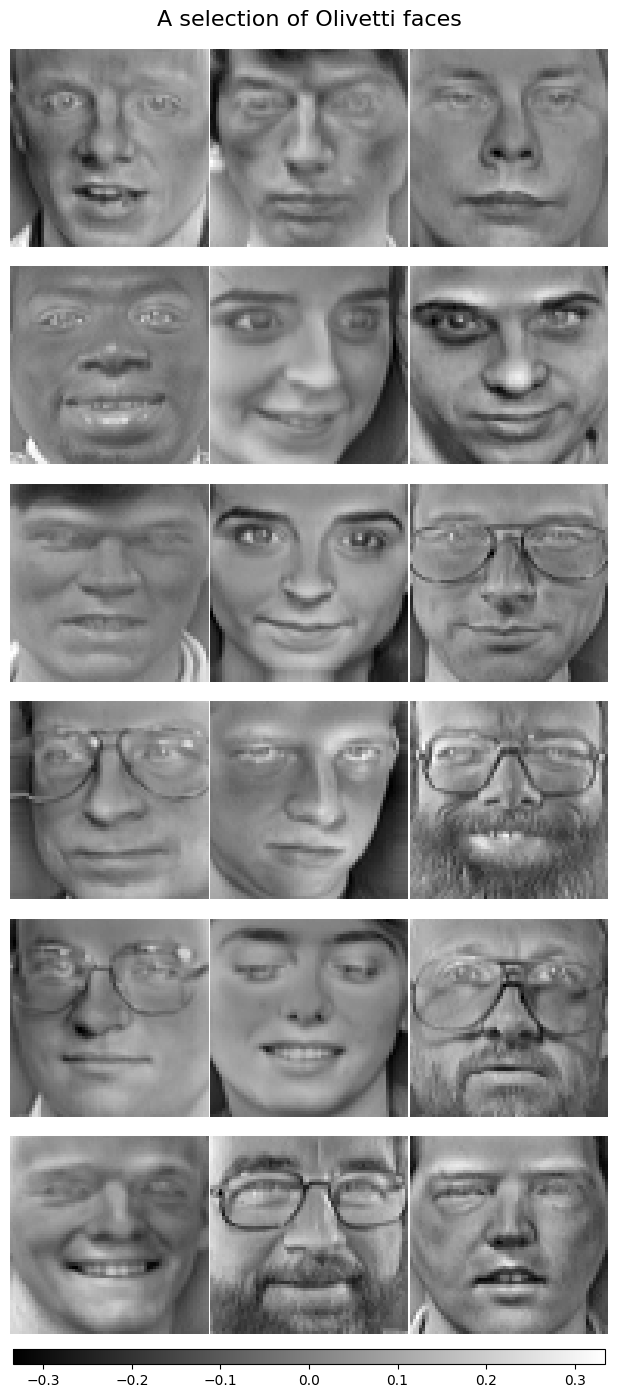

In [62]:
def plot_gallery(
        title: str,
        images_array: np.ndarray,
        n_cols: int = COLS,
        n_rows: int = ROWS
) -> None:
    """
    Plot a sample of images from the Olivetti faces dataset.

    :param title: Plot title
    :param images_array: Array with flattened images
    :param n_cols: Number of plot grid columns
    :param n_rows: Number of plot grid rows
    """
    # Init plot grid
    fig, axes = plt.subplots(
        nrows=ROWS, ncols=COLS,
        figsize=(2.0 * n_cols, 2.3 * n_rows),
        facecolor="white",
        constrained_layout=True
    )

    # Plot grid configuration
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)

    # Plot a sample of images
    for ax, img in zip(axes.flat, images_array):
        v_max = max(img.max(), -img.min())
        image = ax.imshow(
            img.reshape(IMAGE_SHAPE),
            cmap="gray", interpolation="nearest",
            vmin=-v_max, vmax=v_max
        )

        ax.axis("off")

    fig.colorbar(
        image, ax=axes, orientation="horizontal",
        shrink=0.99, aspect=40, pad=0.01
    )

    plt.show()

plot_gallery("A selection of Olivetti faces", flat_images_centered[:N_IMAGES])

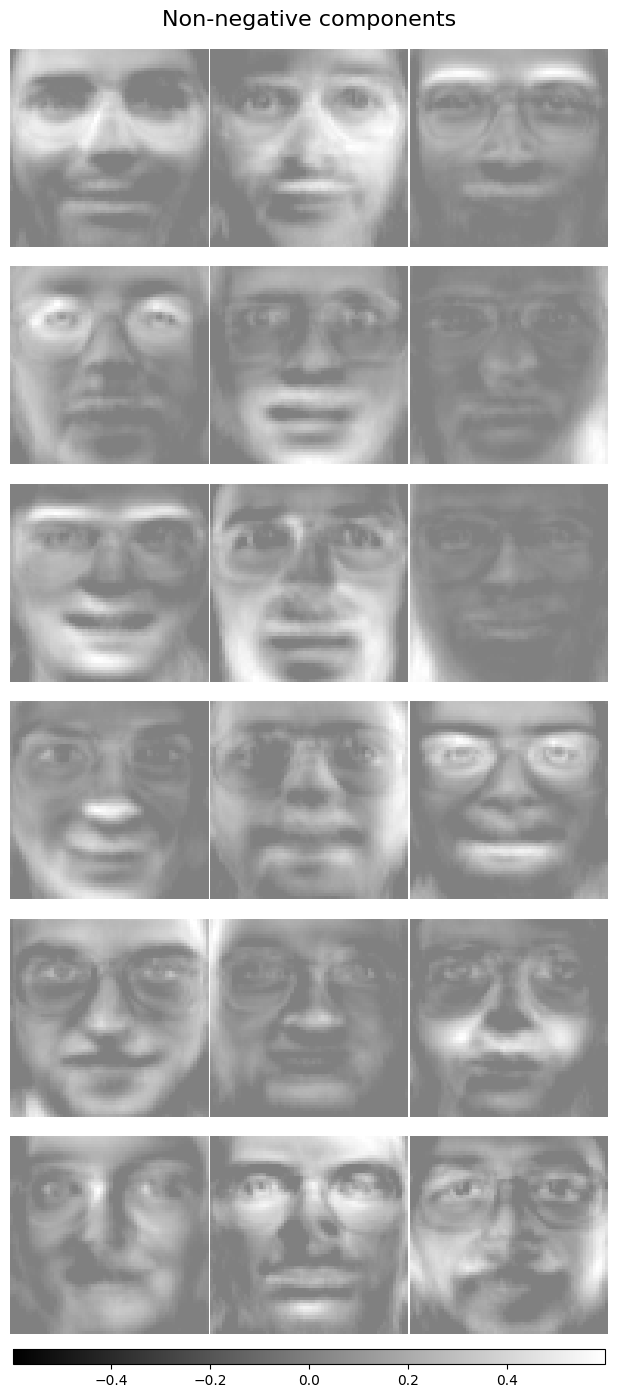

In [67]:
LATENT_FEATURES = N_IMAGES

nmf_model = NMF(
    n_components=LATENT_FEATURES,
    max_iter=500,
    tol=0.001,
    random_state=RANDOM_STATE
)
nmf_model.fit(flat_images)
plot_gallery("Non-negative components", nmf_model.components_[:LATENT_FEATURES])